# Advanced Plotting with Pandas


Most of biggeners when they hear about data vizualization they automatically think of libraries like matplotlib, seaborn, plotly, bokeh etc. But pandas also has a very powerful plotting API that is built on top of matplotlib. This API is very convenient for quick and easy data visualization. In this notebook, we will explore some of the more advanced plotting features of pandas.

In this notebook, we will explore some of the advanced plotting functions that pandas offers, such as:

- **radviz** for visualizing clusters of multivariate data
- **andrews_curves** for visualizing clusters of multivariate data 
- **autocorrelation_plot** for analyzing time series
- **bootstrap_plot** for estimating statistics with resampling
- **boxplot** for comparing distributions
- **scatter_matrix** for creating a matrix of scatter plots


We will use some sample data sets from pandas to demonstrate these functions.

# Radial Visualization


The **radviz** function is used to visualize clusters of multivariate data. It plots each feature as a point on a 2D plane, and then simulates having each sample attached to those points through a spring weighted by the relative value for that feature. The result is a 2D representation of the features, with the relative position of the samples shown by the distance of the points from the center.

For example, let’s plot the famous Titanic dataset using radviz :

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# reading the data
df = pd.read_csv("Titanic.csv")

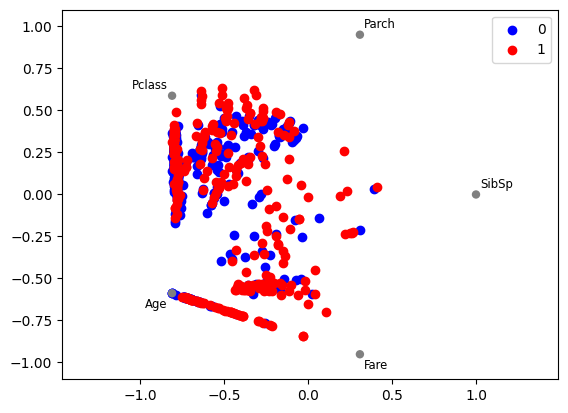

In [98]:
pd.plotting.radviz(df[['SibSp', 'Parch', 'Pclass', 'Age', 'Fare','Survived']], 'Survived', color =['blue', 'red'])
plt.show()

# Andrews Curves


Andrews curves are a way of plotting multivariate data using Fourier series. They can help reveal patterns or clusters in high-dimensional data by mapping each observation onto a function.

To use this function, we need to pass a data frame and a column name that contains the class labels. Optionally, we can also specify an axes object, a color map, and other parameters.

let's use the iris dataset to plot the andrews curves:

In [99]:
# Load the iris data set
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

Note : Andrew Curves work best when the data is normalized within 0 to 1, so we would preprocess the data before applying the function. if you're interested in learning more about scaling you can check my notebook on [Scaling and Normalization](https://www.kaggle.com/code/abdelrahmanekhaldi/intro-to-feature-scaling).

   sepal width (cm)  petal length (cm)  petal width (cm)  sepal length (cm)
0          0.625000           0.067797          0.041667                5.1
1          0.416667           0.067797          0.041667                4.9
2          0.500000           0.050847          0.041667                4.7
3          0.458333           0.084746          0.041667                4.6
4          0.666667           0.067797          0.041667                5.0


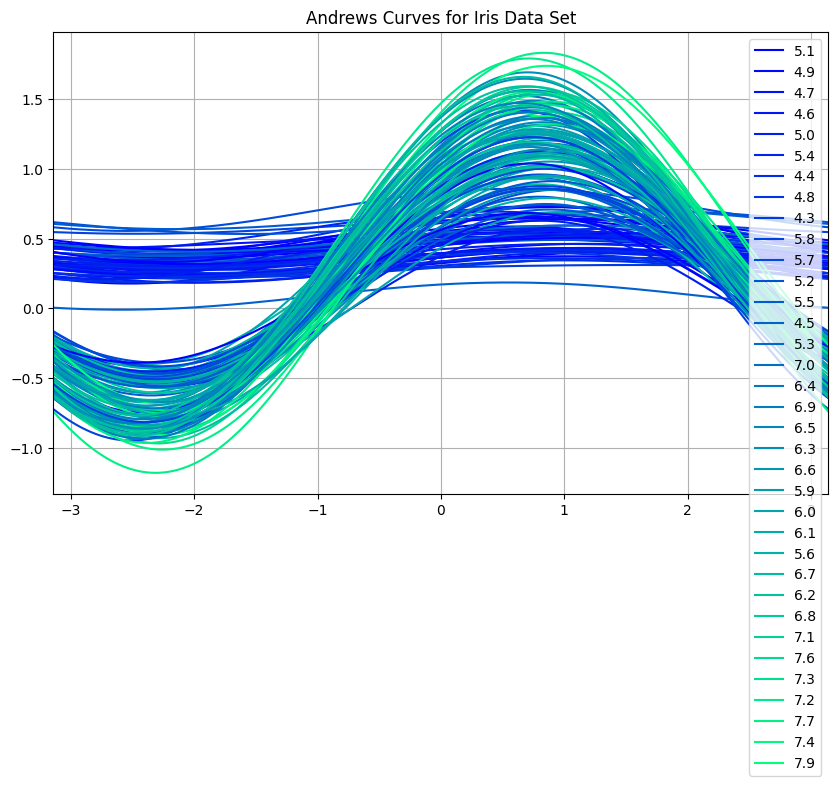

In [100]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop('sepal length (cm)', axis=1))

df_scaled = pd.DataFrame(df_scaled, columns=df.drop('sepal length (cm)', axis =1).columns)
df_scaled['sepal length (cm)'] = df['sepal length (cm)']


# Plot Andrews curves
plt.figure(figsize=(10, 6))
pd.plotting.andrews_curves(df_scaled, "sepal length (cm)", colormap="winter")
plt.title("Andrews Curves for Iris Data Set")
plt.show()

Andrew curves are helpfull to tell us if there's a structure or a patterne in the data, so we can apply ML algorithms to it.

# Autocorrelation Plot


An autocorrelation plot is a way of visualizing the autocorrelation of a time series. It is a plot of the correlation of the series with itself, lagged by x time units. The plot shows the correlation between the series and a lagged copy of itself. The lag value is shown on the x-axis and the correlation on the y-axis.

To use this function, we need to pass a series and optionally an axes object. We can also specify the lag and other parameters.


For example, let’s plot the autocorrelation of the monthly sunspot data set.

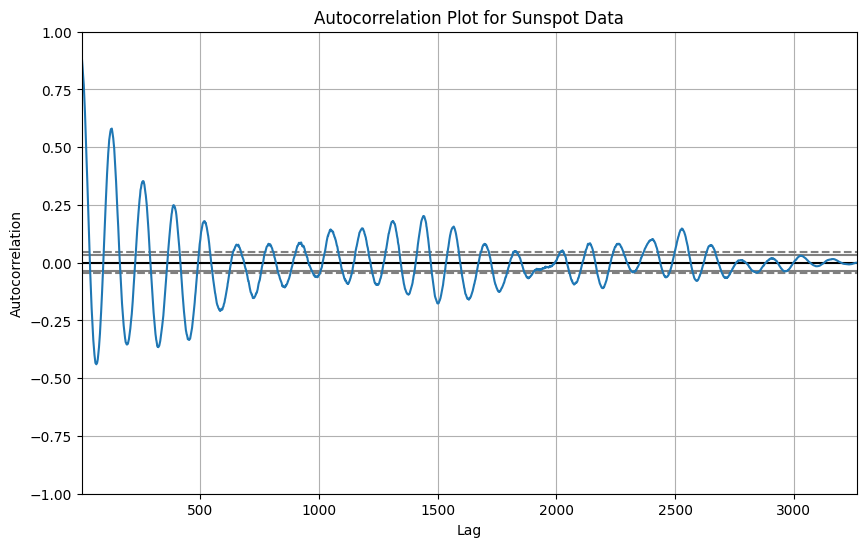

In [101]:
# load monthly sunspot data
df = pd.read_csv("Sunspots.csv")

# Plot the sunspot data
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(df["Monthly Mean Total Sunspot Number"])
plt.title("Autocorrelation Plot for Sunspot Data")
plt.show()

# Bootstrap Plot



A bootstrap plot is a way of estimating statistics with resampling. It is a plot of the bootstrap distribution of a statistic. The plot shows the distribution of a statistic across multiple bootstrap samples. The x-axis shows the values of the statistic and the y-axis shows the frequency.

To use this function, we need to pass a series and optionally an axes object. We can also specify the number of bootstrap samples and other parameters.

For example, let’s plot the bootstrap distribution of the median of the monthly sunspot dataset.

<Figure size 1000x600 with 0 Axes>

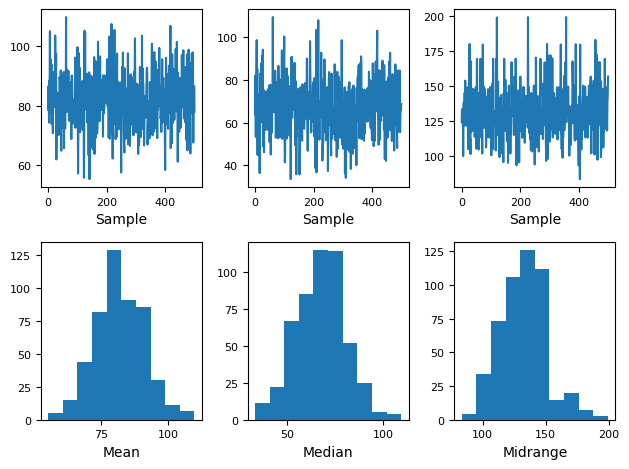

In [102]:
# Plot the sunspot data
plt.figure(figsize=(10, 6))
pd.plotting.bootstrap_plot(df["Monthly Mean Total Sunspot Number"])
plt.show()

This plot is helpful in understanding the distribution of the median of the data set. We can see that the median is around 75 with a standard deviation of 15.

# Box Plot


A box plot is a way of graphically depicting groups of numerical data through their quartiles. It is a plot of the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). 
The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. The position of the whiskers is set by default to 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box. Outlier points are those past the end of the whiskers.

To use this function, we need to pass a data frame and optionally an axes object. We can also specify the column names and other parameters.

For example, let’s use it on titanic data set to compare the age distribution of passengers in different classes.

<Figure size 1000x600 with 0 Axes>

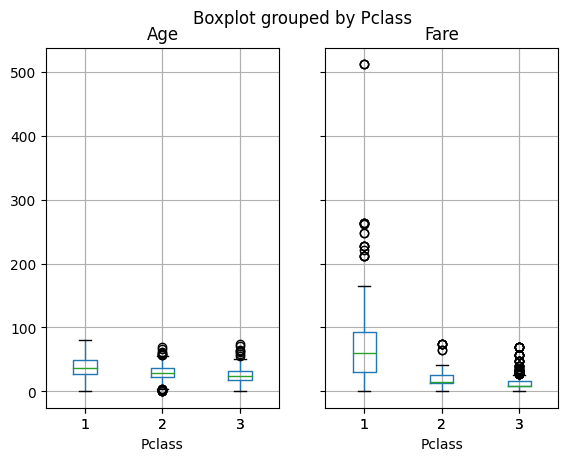

In [103]:
# reading the data
df = pd.read_csv("Titanic.csv")

# Box plot
plt.figure(figsize=(10, 6))
pd.plotting.boxplot(df, column=["Age", "Fare"], by="Pclass")
plt.show()

Box plots are useful for comparing distributions. We can see that the median age of passengers in first class is higher than that of second class, which is higher than that of third class. The first class also has the largest range of ages.

# Scatter Matrix



A scatter matrix is a way of plotting pairwise relationships in a dataset. It is a matrix of scatter plots showing all pairwise scatter plots of multiple variables. The diagonal shows a histogram of each variable.

To use this function, we need to pass a data frame and optionally an axes object. We can also specify the column names and other parameters.

For example, let’s use it on the iris dataset to compare the pairwise relationships of the variables.

<Figure size 1000x600 with 0 Axes>

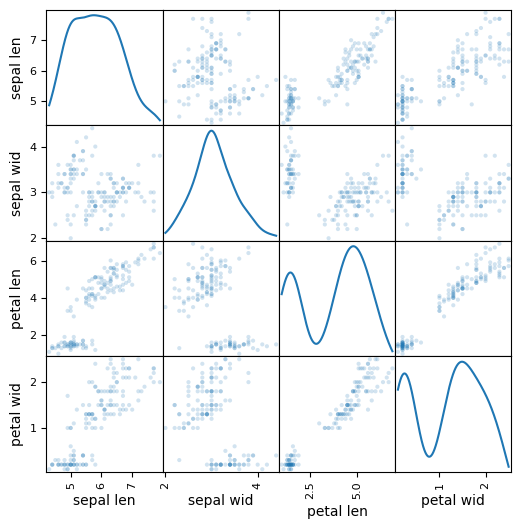

In [104]:
# reading the data
df = pd.DataFrame(iris.data, columns=['sepal len', 'sepal wid', 'petal len', 'petal wid'])

# Scatter matrix
plt.figure(figsize=(10, 6))
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

Scatter matrices are useful for comparing distributions. this plot is helpfull to see if there's a correlation between the variables.